In [1]:
# =============================================================================
# PREDICTING PRICE OF PRE-OWNED CARS 
# =============================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
def read_dataframe(path_to_file_name):
    cars_data=pd.read_csv('cars_sampled.csv' )
    cars=cars_data.copy()
    col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
    cars=cars.drop(columns=col, axis=1)
    cars.drop_duplicates(keep='first',inplace=True)
    cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
    cars['monthOfRegistration']/=12
    cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
    cars['Age']=round(cars['Age'],2)
    cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)
    col=['seller','offerType','abtest']
    cars=cars.drop(columns=col, axis=1)
    cars_copy=cars.copy()
    cars_omit=cars_copy.dropna(axis=0)
    # Converting categorical variables to dummy variables
    cars_omit=pd.get_dummies(cars_omit,drop_first=True) 
    
    # Separating input and output features
    x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
    y1 = cars_omit['price']

#     # Plotting the variable price
#     prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
#     prices.hist()

    # Transforming price as a logarithmic value
    y1 = np.log(y1)
    # Splitting data into test and train
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    
    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = read_dataframe('cars_sampled.csv')

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [6]:
train_dict_omit = X_train.to_dict(orient='records')

In [7]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict_omit)
X_train.shape

(23018, 300)

In [9]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# y_pred = lr.predict(X_test)

# mean_squared_error(y_test, y_pred, squared=False)

0.5455481266513833

/home/modf/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/modf/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


8317.705544113562
-54426919.28843369 0.778953090867219


count    9866.000000
mean    -7914.123448
std      2559.597552
min     -9627.768209
25%     -9607.534776
50%     -9600.238796
75%     -6400.614186
max      -290.177838
Name: price, dtype: float64

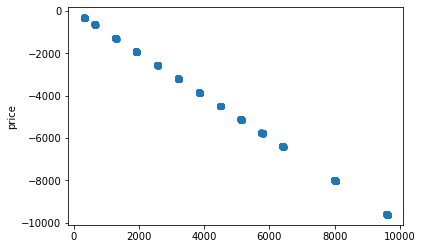

In [8]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

# Model
model_lin1=lgr.fit(X_train,y_train)

# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
residuals1.describe()

In [12]:
# =============================================================================
# RANDOM FOREST WITH OMITTED DATA
# =============================================================================

# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

# Model
model_rf1=rf.fit(X_train,y_train)

# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   


/home/modf/anaconda3/envs/homework-week2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.4360736289370223
0.8504018147750623 0.9202494705146291


In [13]:
with open('./lin_reg.bin', 'wb') as f_out:
    pickle.dump( lgr, f_out)


In [14]:
with open('./random_forest.bin', 'wb') as f_out:
    pickle.dump( rf, f_out)